In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importing data

In [2]:
my_data = pd.read_csv("/Users/mobilegalery/Desktop/projet machine learning/healthcare-dataset-stroke-data.csv")
my_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Data exploration and data cleaning

In [3]:
my_data.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

We notice here that the colum "bmi" have 201 missing values

In [4]:
my_data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
my_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
my_data.loc[my_data.stroke==1].shape[0]

249

***NOTE :*** It appears that we have a relatively small number of stroke cases in our dataset, with only 249 instances of stroke out of a total of 5,110 examples. This limited number of positive cases may pose challenges when building and evaluating predictive models for strokes, as having an imbalanced dataset can affect model performance. 
Let's search more data and add it to ours.

In [7]:
my_data2 = pd.read_csv("/Users/mobilegalery/Desktop/projet machine learning/dataset.csv")
my_data2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [8]:
my_data2.loc[my_data2.stroke==1].shape[0]

783

In [9]:
my_data3 = pd.read_csv("/Users/mobilegalery/Desktop/projet machine learning/stroke_data.csv")
my_data3

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
40905,1.0,38.0,0,0,0,4,1,120.94,29.7,1,0
40906,0.0,53.0,0,0,1,4,0,77.66,40.8,0,0
40907,1.0,32.0,0,0,1,2,0,231.95,33.2,0,0
40908,1.0,42.0,0,0,1,3,0,216.38,34.5,0,0


In [10]:
my_data3.loc[my_data3.stroke==1].shape[0]

20460

Let's construct a new data set from these three data sets :

In [11]:
my_data = pd.concat([my_data, my_data2, my_data3], axis=0)
my_data.reset_index(drop=True, inplace=True)
my_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,sex
0,9046.0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,NaN
1,51676.0,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,NaN
2,31112.0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,NaN
3,60182.0,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,NaN
4,1665.0,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89415,NaN,NaN,38.0,0,0,0,4,1,120.94,29.7,1,0,1.0
89416,NaN,NaN,53.0,0,0,1,4,0,77.66,40.8,0,0,0.0
89417,NaN,NaN,32.0,0,0,1,2,0,231.95,33.2,0,0,1.0
89418,NaN,NaN,42.0,0,0,1,3,0,216.38,34.5,0,0,1.0


In [12]:
duplicated_rows = my_data.duplicated()
duplicated_rows 

0        False
1        False
2        False
3        False
4        False
         ...  
89415    False
89416    False
89417    False
89418    False
89419    False
Length: 89420, dtype: bool

In [13]:
my_data.loc[my_data.stroke==1].shape[0]

21492

That's a significant improvement in the dataset size. With 89,420 rows and 21,492 examples that have experienced a stroke, we now have a much larger and more balanced dataset. This increase in data should provide more robust and reliable results when developing predictive models or conducting analyses related to strokes. It's essential to ensure data quality and consistency when adding more data to maintain the dataset's integrity for accurate modeling and analysis.

In [14]:
my_data.count()

id                   48510
gender               48510
age                  89420
hypertension         89420
heart_disease        89420
ever_married         89420
work_type            89420
Residence_type       89420
avg_glucose_level    89420
bmi                  87757
smoking_status       76128
stroke               89420
sex                  40907
dtype: int64

We've encountered missing values in several features, including "id," "gender," "bmi," and "smoking_status." Additionally, we've introduced a new column named "sex," which essentially represents gender as 1 for male and 0 for female. Let's consolidate these two features into one and address the missing data.

In [15]:
my_data['combined_gender'] = np.where((my_data['sex'] == 1) | (my_data['gender'] == "Male"), 1, 0)
my_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,sex,combined_gender
0,9046.0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,NaN,1
1,51676.0,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,NaN,0
2,31112.0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,NaN,1
3,60182.0,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,NaN,0
4,1665.0,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89415,NaN,NaN,38.0,0,0,0,4,1,120.94,29.7,1,0,1.0,1
89416,NaN,NaN,53.0,0,0,1,4,0,77.66,40.8,0,0,0.0,0
89417,NaN,NaN,32.0,0,0,1,2,0,231.95,33.2,0,0,1.0,1
89418,NaN,NaN,42.0,0,0,1,3,0,216.38,34.5,0,0,1.0,1


In [16]:
my_data.combined_gender.count()

89420

Excellent! We now have a column fully populated with gender information. It's time to remove the two redundant features, "sex" and "gender," and give the newly combined column the name "combined_gender."

In [17]:
my_data.drop(["sex", "gender"], axis=1, inplace=True)
my_data

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,combined_gender
0,9046.0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,51676.0,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0
2,31112.0,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1
3,60182.0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0
4,1665.0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
89415,NaN,38.0,0,0,0,4,1,120.94,29.7,1,0,1
89416,NaN,53.0,0,0,1,4,0,77.66,40.8,0,0,0
89417,NaN,32.0,0,0,1,2,0,231.95,33.2,0,0,1
89418,NaN,42.0,0,0,1,3,0,216.38,34.5,0,0,1


In [18]:
my_data.rename(columns={'combined_gender': 'gender'}, inplace=True)
my_data

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender
0,9046.0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,51676.0,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0
2,31112.0,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1
3,60182.0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0
4,1665.0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
89415,NaN,38.0,0,0,0,4,1,120.94,29.7,1,0,1
89416,NaN,53.0,0,0,1,4,0,77.66,40.8,0,0,0
89417,NaN,32.0,0,0,1,2,0,231.95,33.2,0,0,1
89418,NaN,42.0,0,0,1,3,0,216.38,34.5,0,0,1


In [19]:
my_data.gender.unique()

array([1, 0])

In [20]:
my_data.ever_married.unique()

array(['Yes', 'No', 1, 0], dtype=object)

In [21]:
my_data.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked',
       4, 3, 2, 1, 0], dtype=object)

In [22]:
my_data.Residence_type.unique()

array(['Urban', 'Rural', 1, 0], dtype=object)

In [23]:
my_data.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown', nan, 1, 0],
      dtype=object)

We also observe that the features "ever_married," "work_type," "Residence_type," and "smoking_status" contain data that is encoded and explicitly written. To ensure data consistency, we need to encode these features.

In [24]:
my_data['ever_married'] = np.where((my_data['ever_married'] == 1) | (my_data['ever_married'] == "Yes"), 1, 0)
my_data['Residence_type'] = np.where((my_data['Residence_type'] == 1) | (my_data['Residence_type'] == "Urban"), 1, 0)
my_data['work_type'] = np.where((my_data['work_type'] == "Private") | (my_data['work_type'] == 4), 4,
                                np.where((my_data['work_type'] == "Self-employed") | (my_data['work_type'] == 3), 3,
                                         np.where((my_data['work_type'] == "Govt_job") | (my_data['work_type'] == 2), 2,
                                                  np.where((my_data['work_type'] == "children") | (my_data['work_type'] == 1), 1,
                                                           np.where((my_data['work_type'] == "Never_worked") | (my_data['work_type'] == 0), 0, my_data['work_type'])
                                                          )
                                                 )
                                        )
                                    )
my_data

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender
0,9046.0,67.0,0,1,1,4,1,228.69,36.6,formerly smoked,1,1
1,51676.0,61.0,0,0,1,3,0,202.21,NaN,never smoked,1,0
2,31112.0,80.0,0,1,1,4,0,105.92,32.5,never smoked,1,1
3,60182.0,49.0,0,0,1,4,1,171.23,34.4,smokes,1,0
4,1665.0,79.0,1,0,1,3,0,174.12,24.0,never smoked,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
89415,NaN,38.0,0,0,0,4,1,120.94,29.7,1,0,1
89416,NaN,53.0,0,0,1,4,0,77.66,40.8,0,0,0
89417,NaN,32.0,0,0,1,2,0,231.95,33.2,0,0,1
89418,NaN,42.0,0,0,1,3,0,216.38,34.5,0,0,1


In [25]:
my_data['smoking_status'] = my_data['smoking_status'].replace({1: "smokes", 0: "never smoked"})
my_data

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender
0,9046.0,67.0,0,1,1,4,1,228.69,36.6,formerly smoked,1,1
1,51676.0,61.0,0,0,1,3,0,202.21,NaN,never smoked,1,0
2,31112.0,80.0,0,1,1,4,0,105.92,32.5,never smoked,1,1
3,60182.0,49.0,0,0,1,4,1,171.23,34.4,smokes,1,0
4,1665.0,79.0,1,0,1,3,0,174.12,24.0,never smoked,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
89415,NaN,38.0,0,0,0,4,1,120.94,29.7,smokes,0,1
89416,NaN,53.0,0,0,1,4,0,77.66,40.8,never smoked,0,0
89417,NaN,32.0,0,0,1,2,0,231.95,33.2,never smoked,0,1
89418,NaN,42.0,0,0,1,3,0,216.38,34.5,never smoked,0,1


In [26]:
my_data.smoking_status.fillna("Unknown", inplace=True)
my_data.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [27]:
smoking_status_mapping = {
    'Unknown': 0,
    'never smoked': 1,
    'formerly smoked': 2,
    'smokes': 3
}

my_data['smoking_status'] = my_data['smoking_status'].replace(smoking_status_mapping)
my_data

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender
0,9046.0,67.0,0,1,1,4,1,228.69,36.6,2,1,1
1,51676.0,61.0,0,0,1,3,0,202.21,NaN,1,1,0
2,31112.0,80.0,0,1,1,4,0,105.92,32.5,1,1,1
3,60182.0,49.0,0,0,1,4,1,171.23,34.4,3,1,0
4,1665.0,79.0,1,0,1,3,0,174.12,24.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
89415,NaN,38.0,0,0,0,4,1,120.94,29.7,3,0,1
89416,NaN,53.0,0,0,1,4,0,77.66,40.8,1,0,0
89417,NaN,32.0,0,0,1,2,0,231.95,33.2,1,0,1
89418,NaN,42.0,0,0,1,3,0,216.38,34.5,1,0,1


In [28]:
my_data.count()

id                   48510
age                  89420
hypertension         89420
heart_disease        89420
ever_married         89420
work_type            89420
Residence_type       89420
avg_glucose_level    89420
bmi                  87757
smoking_status       89420
stroke               89420
gender               89420
dtype: int64

We can safely consider the "id" column as redundant, especially given that our data is already indexed. Removing it is a reasonable choice, as it contains missing values and is not worth the time and effort to clean or fill. Our primary concern now is addressing the missing values in the "bmi" column.

In [29]:
my_data = my_data.drop(columns=['id'])
my_data

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender
0,67.0,0,1,1,4,1,228.69,36.6,2,1,1
1,61.0,0,0,1,3,0,202.21,NaN,1,1,0
2,80.0,0,1,1,4,0,105.92,32.5,1,1,1
3,49.0,0,0,1,4,1,171.23,34.4,3,1,0
4,79.0,1,0,1,3,0,174.12,24.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
89415,38.0,0,0,0,4,1,120.94,29.7,3,0,1
89416,53.0,0,0,1,4,0,77.66,40.8,1,0,0
89417,32.0,0,0,1,2,0,231.95,33.2,1,0,1
89418,42.0,0,0,1,3,0,216.38,34.5,1,0,1


In [30]:
my_data.bmi.mean()

29.460886311063504

Given that the mean of the bmi in our dataset falls between the ranges of overweight, not obese, and not normal, it seems reasonable to replace the missing values with this mean, as it does not significantly impact the underlying logic.

In [31]:
my_data.bmi.fillna(my_data.bmi.mean().round(1), inplace=True)
my_data

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender
0,67.0,0,1,1,4,1,228.69,36.6,2,1,1
1,61.0,0,0,1,3,0,202.21,29.5,1,1,0
2,80.0,0,1,1,4,0,105.92,32.5,1,1,1
3,49.0,0,0,1,4,1,171.23,34.4,3,1,0
4,79.0,1,0,1,3,0,174.12,24.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
89415,38.0,0,0,0,4,1,120.94,29.7,3,0,1
89416,53.0,0,0,1,4,0,77.66,40.8,1,0,0
89417,32.0,0,0,1,2,0,231.95,33.2,1,0,1
89418,42.0,0,0,1,3,0,216.38,34.5,1,0,1


In [32]:
my_data.describe()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender
count,89420.000000,89420.000000,89420.000000,89420.000000,89420.000000,89420.000000,89420.000000,89420.000000,89420.000000,89420.000000
mean,46.443107,0.148815,0.084578,0.725699,0.507895,112.626829,29.461614,1.539275,0.240349,0.475833
std,22.570868,0.355908,0.278255,0.446164,0.499940,51.093198,7.337862,1.091693,0.427298,0.499418
min,-9.000000,0.000000,0.000000,0.000000,0.000000,55.000000,10.100000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,78.030000,24.500000,1.000000,0.000000,0.000000
50%,48.000000,0.000000,0.000000,1.000000,1.000000,94.140000,28.700000,1.000000,0.000000,0.000000
75%,64.000000,0.000000,0.000000,1.000000,1.000000,123.490000,33.200000,3.000000,0.000000,1.000000
max,103.000000,1.000000,1.000000,1.000000,1.000000,291.050000,97.600000,3.000000,1.000000,1.000000


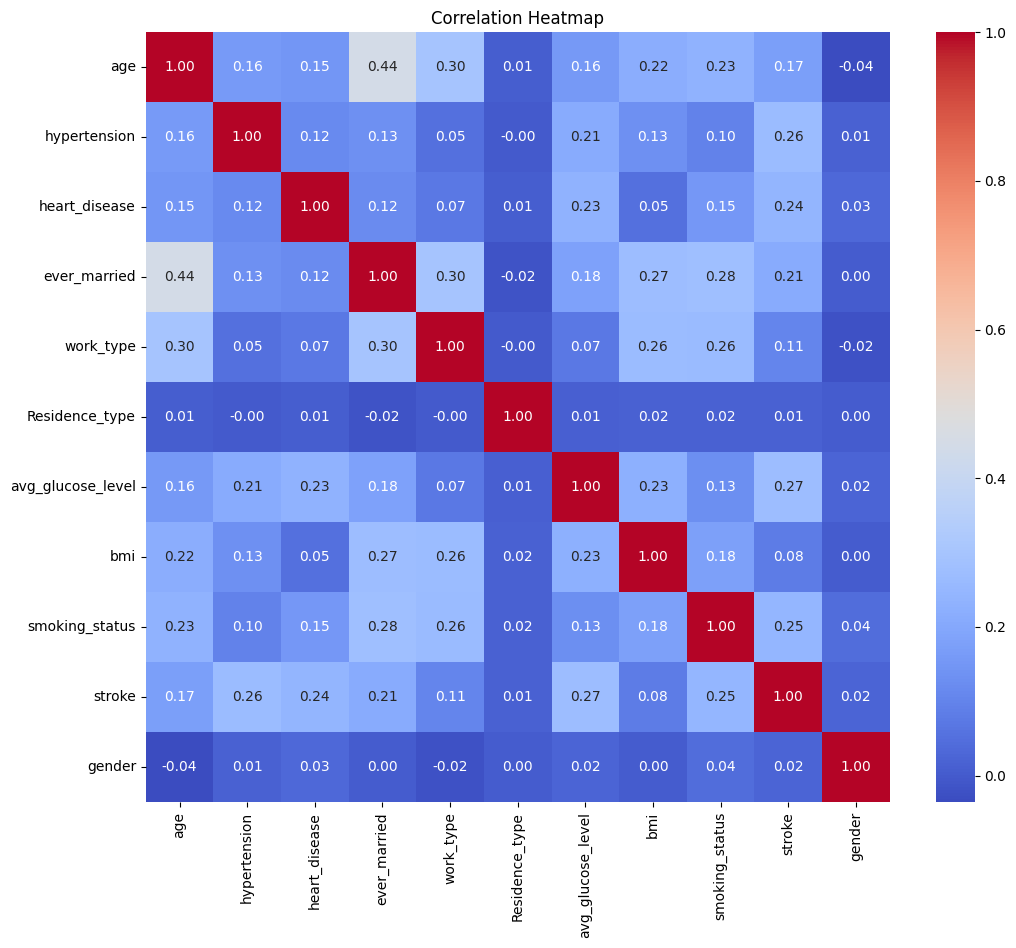

In [33]:
correlation_matrix = my_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()

It's interesting here is that BMI (Body Mass Index) doesn't show a strong correlation with the "stroke" column, despite existing literature indicating that individuals with higher body fat have a greater probability of experiencing a stroke. Being categorized as overweight can increase your stroke risk by 22%, and if you're obese, that risk can rise by 64%. This connection arises because carrying excess weight can lead to conditions like high blood pressure, heart disease, high cholesterol, and type 2 diabetes, all of which contribute to a higher likelihood of experiencing a stroke. 
Even the feature most strongly correlated with the 'stroke' column, namely the 'avg_glucose_level' column, exhibits a relatively modest correlation coefficient of 0.27.
Perhaps we should consider exploring some feature engineering techniques.

## Feature engineering

In [34]:
df= my_data.loc[my_data.bmi > 35]
df

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender
0,67.0,0,1,1,4,1,228.69,36.6,2,1,1
11,61.0,0,1,1,2,0,120.46,36.8,3,1,0
16,64.0,0,1,1,4,1,191.61,37.5,3,1,1
18,60.0,0,0,0,4,1,89.22,37.8,1,1,0
21,52.0,1,0,1,3,1,233.29,48.9,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
89398,54.0,0,0,1,4,1,99.78,38.0,1,0,1
89399,48.0,0,0,1,3,0,201.45,43.8,3,0,1
89403,62.0,0,0,1,4,1,65.48,50.5,1,0,1
89405,65.0,0,0,1,3,0,102.21,36.3,1,0,0


In [35]:
my_data.bmi.max()

97.6

It is understandable why there is no correlation in the BMI feature, as there are outliers that are clearly erroneous, such as a BMI of 97.6. After conducting basic research, we can reasonably conclude that the BMI value should never exceed 66.

In [36]:
df.loc[df.stroke==1]

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender
0,67.0,0,1,1,4,1,228.69,36.6,2,1,1
11,61.0,0,1,1,2,0,120.46,36.8,3,1,0
16,64.0,0,1,1,4,1,191.61,37.5,3,1,1
18,60.0,0,0,0,4,1,89.22,37.8,1,1,0
21,52.0,1,0,1,3,1,233.29,48.9,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
68944,83.0,1,0,1,4,0,190.14,36.5,1,1,0
68953,87.0,0,1,1,4,0,231.56,36.9,1,1,0
68957,75.0,0,0,1,4,1,205.77,46.0,3,1,0
68958,80.0,1,0,1,4,0,242.52,45.5,3,1,1


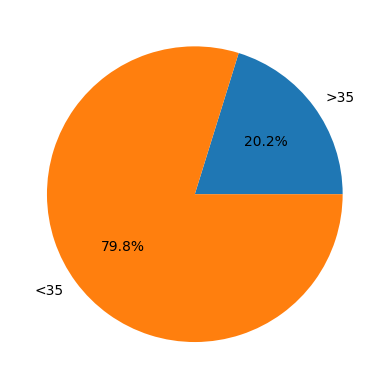

In [37]:
plt.pie([df.loc[df.stroke==1].shape[0],my_data.loc[my_data.stroke==1].shape[0]-df.loc[df.stroke==1].shape[0]],labels=[">35","<35"],autopct="%1.1f%%")
plt.show()

Let's create BMI categories (underweight : 0, normal weight:1, overweight:2, obese:3, extremely obese:4) based on established BMI ranges.

In [38]:
df = pd.DataFrame()

conditions = [
    (my_data['bmi'] < 18.5),
    (my_data['bmi'] >= 18.5) & (my_data['bmi'] < 24.9),
    (my_data['bmi'] >= 24.9) & (my_data['bmi'] < 30),
    (my_data['bmi'] >= 30) & (my_data['bmi'] < 34.9),
    (my_data['bmi'] >= 34.9)
]

values = [0, 1, 2, 3, 4]

df["BMI_category"] = np.select(conditions, values, default=np.nan)
df


,BMI_category
0,4.0
1,2.0
2,3.0
3,3.0
4,1.0
...,...
89415,2.0
89416,4.0
89417,3.0
89418,3.0


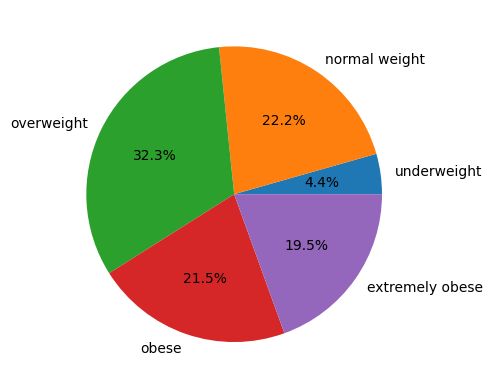

In [39]:
plt.pie([df.loc[df.BMI_category==0].shape[0],df.loc[df.BMI_category==1].shape[0],df.loc[df.BMI_category==2].shape[0],df.loc[df.BMI_category==3].shape[0],df.loc[df.BMI_category==4].shape[0]],labels=["underweight", "normal weight", "overweight", "obese", "extremely obese"],autopct="%1.1f%%")
plt.show()

In [40]:
df["stroke"]=my_data.stroke
df

,BMI_category,stroke
0,4.0,1
1,2.0,1
2,3.0,1
3,3.0,1
4,1.0,1
...,...,...
89415,2.0,0
89416,4.0,0
89417,3.0,0
89418,3.0,0


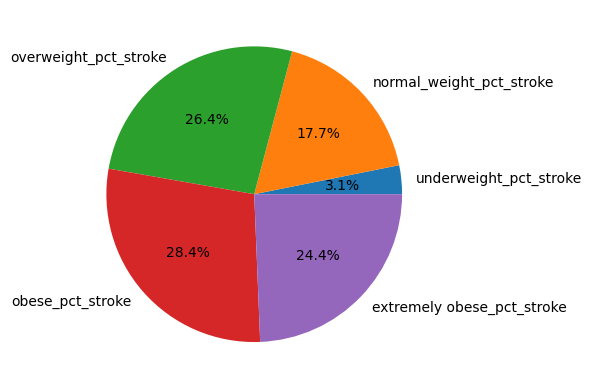

In [41]:
underweight_pct_stroke = df.loc[(df.BMI_category==0)&(df.stroke==1)].shape[0]/df.loc[df.BMI_category==0].shape[0]
normal_weight_pct_stroke= df.loc[(df.BMI_category==1)&(df.stroke==1)].shape[0]/df.loc[df.BMI_category==1].shape[0]
overweight_pct_stroke=df.loc[(df.BMI_category==2)&(df.stroke==1)].shape[0]/df.loc[df.BMI_category==2].shape[0]
obese_pct_stroke=df.loc[(df.BMI_category==3)&(df.stroke==1)].shape[0]/df.loc[df.BMI_category==3].shape[0]
extremely_obese_pct_stroke=df.loc[(df.BMI_category==4)&(df.stroke==1)].shape[0]/df.loc[df.BMI_category==4].shape[0]
pcts = [underweight_pct_stroke,normal_weight_pct_stroke,overweight_pct_stroke,obese_pct_stroke,extremely_obese_pct_stroke]
plt.pie(pcts,labels=["underweight_pct_stroke","normal_weight_pct_stroke","overweight_pct_stroke","obese_pct_stroke","extremely obese_pct_stroke"],autopct="%1.1f%%")
plt.show()


The results appear to be reasonable.

In [42]:
df["category_pct"]=np.where((df['BMI_category'] == 0), underweight_pct_stroke,
                                np.where((df['BMI_category'] == 1), normal_weight_pct_stroke,
                                         np.where((df['BMI_category'] == 2), overweight_pct_stroke,
                                                  np.where((df['BMI_category'] == 3), obese_pct_stroke,
                                                           np.where((df['BMI_category'] ==4), extremely_obese_pct_stroke, df['BMI_category'])
                                                          )
                                                 )
                                        )
                                    )
df

,BMI_category,stroke,category_pct
0,4.0,1,0.249440
1,2.0,1,0.269977
2,3.0,1,0.290912
3,3.0,1,0.290912
4,1.0,1,0.181521
...,...,...,...
89415,2.0,0,0.269977
89416,4.0,0,0.249440
89417,3.0,0,0.290912
89418,3.0,0,0.290912


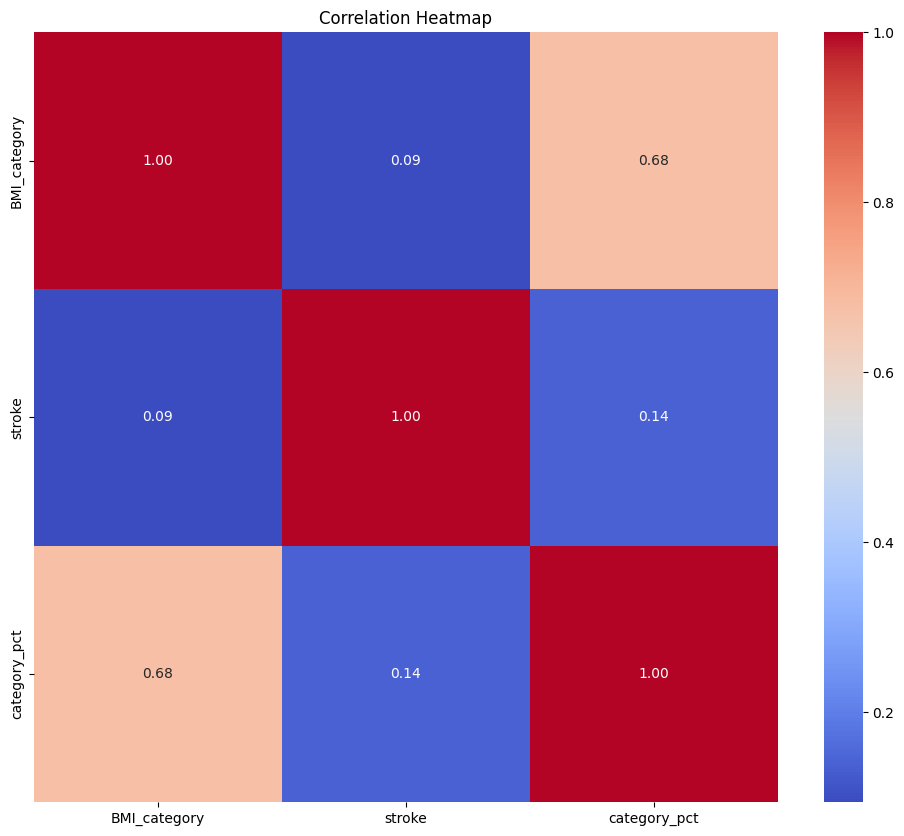

In [43]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()

Excellent! The new feature, category_pct, exhibits a stronger correlation with the "stroke" column, boasting a coefficient of 0.14, surpassing the initial BMI feature's correlation of 0.08. Let's add it to our dataset.

In [44]:
my_data["bmi_category_pct"]=df.category_pct
my_data

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender,bmi_category_pct
0,67.0,0,1,1,4,1,228.69,36.6,2,1,1,0.249440
1,61.0,0,0,1,3,0,202.21,29.5,1,1,0,0.269977
2,80.0,0,1,1,4,0,105.92,32.5,1,1,1,0.290912
3,49.0,0,0,1,4,1,171.23,34.4,3,1,0,0.290912
4,79.0,1,0,1,3,0,174.12,24.0,1,1,0,0.181521
...,...,...,...,...,...,...,...,...,...,...,...,...
89415,38.0,0,0,0,4,1,120.94,29.7,3,0,1,0.269977
89416,53.0,0,0,1,4,0,77.66,40.8,1,0,0,0.249440
89417,32.0,0,0,1,2,0,231.95,33.2,1,0,1,0.290912
89418,42.0,0,0,1,3,0,216.38,34.5,1,0,1,0.290912


In [45]:
df["new"]=df.category_pct*my_data.avg_glucose_level
df

,BMI_category,stroke,category_pct,new
0,4.0,1,0.249440,57.044495
1,2.0,1,0.269977,54.592015
2,3.0,1,0.290912,30.813391
3,3.0,1,0.290912,49.812848
4,1.0,1,0.181521,31.606403
...,...,...,...,...
89415,2.0,0,0.269977,32.650998
89416,4.0,0,0.249440,19.371531
89417,3.0,0,0.290912,67.477020
89418,3.0,0,0.290912,62.947522


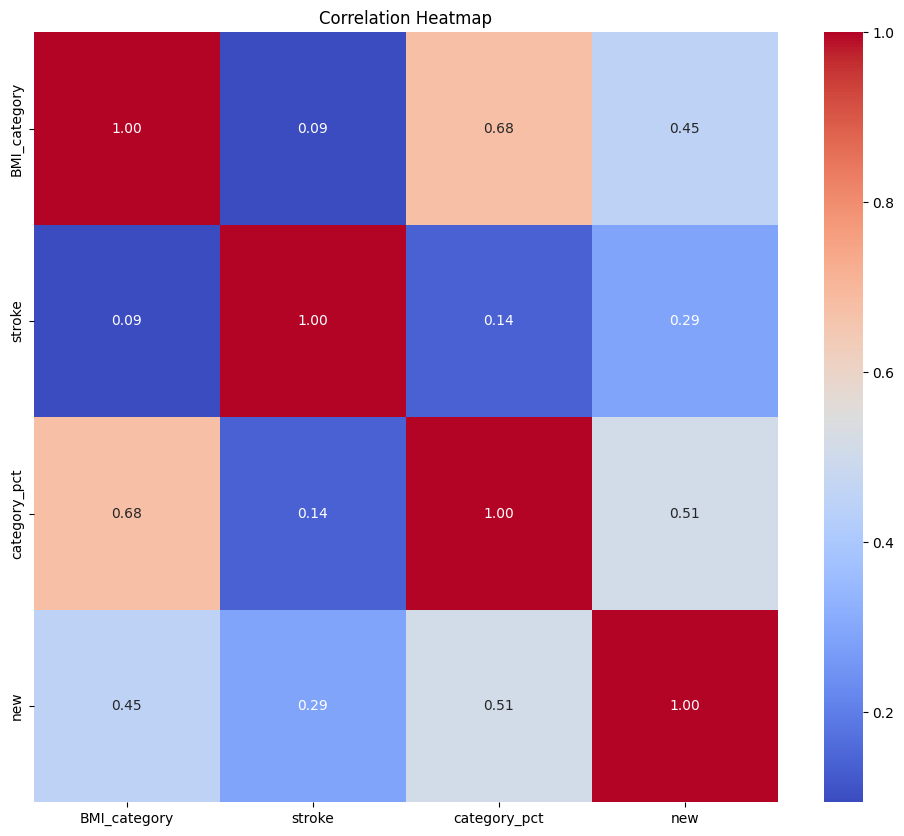

In [46]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()

While the new feature exhibits a slightly improved correlation with the target variable compared to avg_glucose_level, the difference is relatively small (0.02). Furthermore, there is no corresponding domain-specific variable or meaningful interpretation for this new feature. Consequently, we have decided not to include this feature in our dataset.

Let's create visualizations for the other features to gain a better understanding of our dataset.

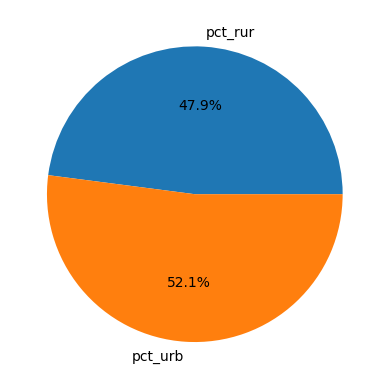

In [47]:
pct_urb = my_data.loc[(my_data.Residence_type==0)&(my_data.stroke==1)].shape[0]
pct_rur = my_data.loc[(my_data.Residence_type==1)&(my_data.stroke==1)].shape[0]
plt.pie([pct_urb,pct_rur],labels=["pct_rur","pct_urb"],autopct="%1.1f%%")
plt.show()

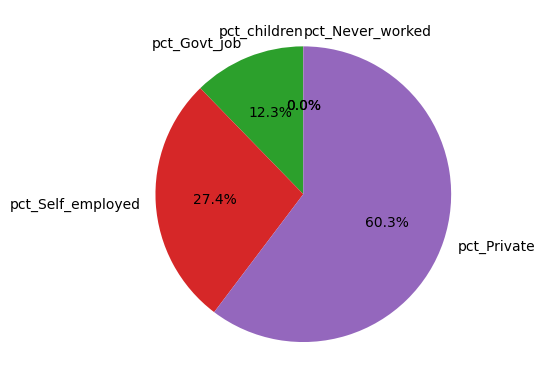

In [48]:
pct_Never_worked = my_data.loc[(my_data.work_type==0)&(my_data.stroke==1)].shape[0]
pct_children = my_data.loc[(my_data.work_type==1)&(my_data.stroke==1)].shape[0]
pct_Govt_job = my_data.loc[(my_data.work_type==2)&(my_data.stroke==1)].shape[0]
pct_Self_employed = my_data.loc[(my_data.work_type==3)&(my_data.stroke==1)].shape[0]
pct_Private = my_data.loc[(my_data.work_type==4)&(my_data.stroke==1)].shape[0]
plt.pie([pct_Never_worked,pct_children,pct_Govt_job,pct_Self_employed,pct_Private],labels=["pct_Never_worked","pct_children","pct_Govt_job","pct_Self_employed","pct_Private"],autopct="%1.1f%%",startangle=90)
plt.show()


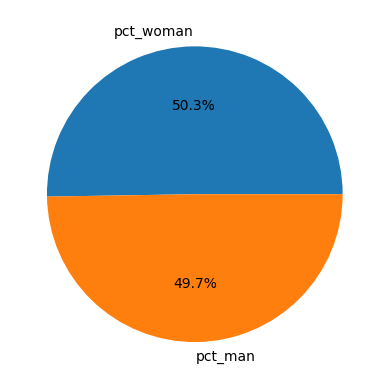

In [49]:
pct_woman = my_data.loc[(my_data.gender==0)&(my_data.stroke==1)].shape[0]
pct_man = my_data.loc[(my_data.gender==1)&(my_data.stroke==1)].shape[0]
plt.pie([pct_woman,pct_man],labels=["pct_woman","pct_man"],autopct="%1.1f%%")
plt.show()

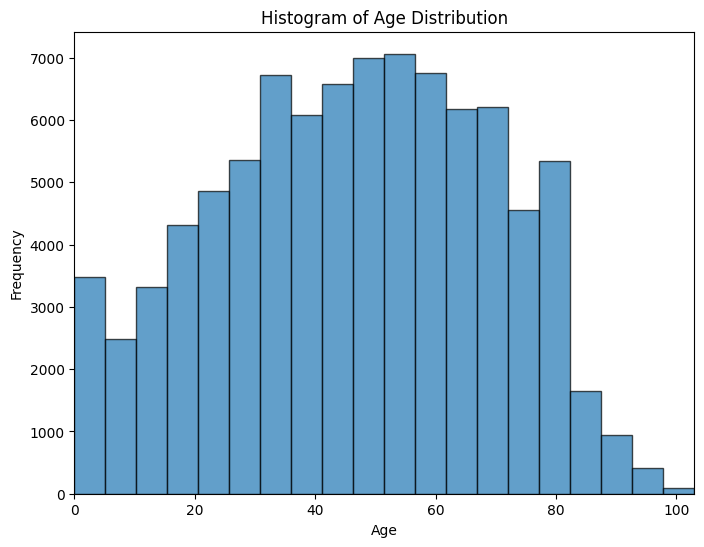

Mean Age: 46.44
Median Age: 48.0
Standard Deviation of Age: 22.57


In [50]:
ages = my_data.age

# Plotting a histogram
plt.figure(figsize=(8, 6))
plt.hist(ages, bins=20, range=(0, 103), edgecolor='black', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age Distribution")
plt.xlim(0, 103)
plt.show()

# Calculate mean, median, and standard deviation
mean_age = np.mean(ages)
median_age = np.median(ages)
std_dev_age = np.std(ages)

print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age}")
print(f"Standard Deviation of Age: {std_dev_age:.2f}")


In [51]:
heart_d_s = my_data.loc[(my_data.heart_disease ==1) &(my_data.stroke ==1)].shape[0] 
heart_d_good = my_data.loc[(my_data.heart_disease ==1) &(my_data.stroke ==0)].shape[0]
no_heart_d_s = my_data.loc[(my_data.heart_disease ==0) &(my_data.stroke ==1)].shape[0]
no_heart_d_good = my_data.loc[(my_data.heart_disease ==0) &(my_data.stroke ==0)].shape[0]
print("People with heart disease that had stroke : " , heart_d_s)
print("People with heart disease that hadn't stroke : ",heart_d_good)
print("People with no heart disease that had stroke : ",no_heart_d_s)
print("People with no heart disease that hadn't stroke : ",no_heart_d_good)

People with heart disease that had stroke :  4366
People with heart disease that hadn't stroke :  3197
People with no heart disease that had stroke :  17126
People with no heart disease that hadn't stroke :  64731


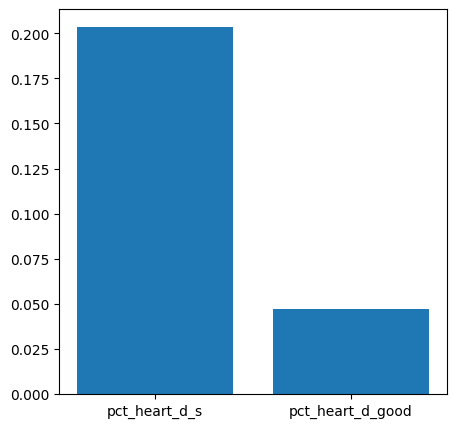

In [52]:
pct_heart_d_s = heart_d_s / my_data.loc[my_data.stroke ==1].shape[0] 
pct_heart_d_good = heart_d_good / my_data.loc[my_data.stroke ==0].shape[0] 
plt.figure(figsize=(5, 5))
plt.bar(["pct_heart_d_s","pct_heart_d_good"],[pct_heart_d_s,pct_heart_d_good])
plt.show()

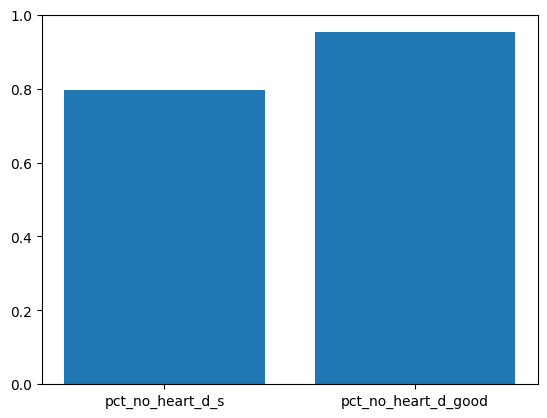

In [53]:
pct_no_heart_d_s = no_heart_d_s / my_data.loc[my_data.stroke ==1].shape[0] 
pct_no_heart_d_good = no_heart_d_good / my_data.loc[my_data.stroke ==0].shape[0] 
plt.bar(["pct_no_heart_d_s","pct_no_heart_d_good"],[pct_no_heart_d_s,pct_no_heart_d_good])
plt.show()

We observe that heart disease significantly affects the likelihood of experiencing a stroke.

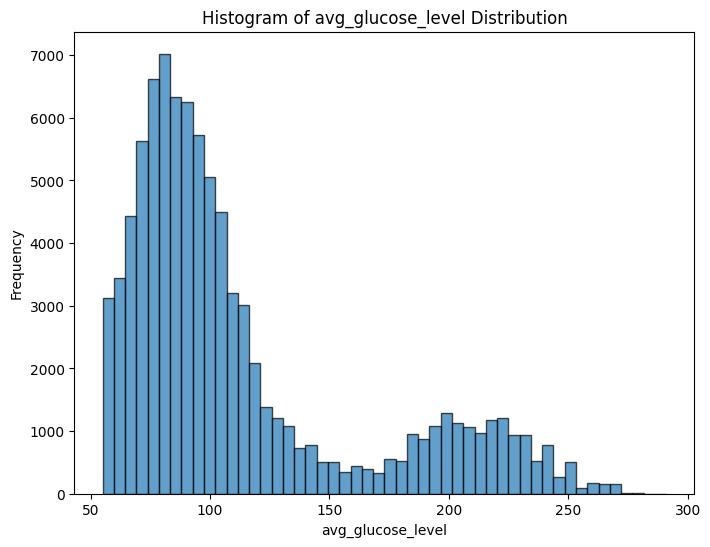

Mean avg_glucose_level: 112.63
Median avg_glucose_level: 94.14
Standard Deviation of avg_glucose_level: 51.09


In [54]:
avg_gl_level = my_data.avg_glucose_level

# Plotting a histogram
plt.figure(figsize=(8, 6))
plt.hist(avg_gl_level, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel("avg_glucose_level")
plt.ylabel("Frequency")
plt.title("Histogram of avg_glucose_level Distribution")
plt.show()

# Calculate mean, median, and standard deviation
mean_avg_gl_level = np.mean(avg_gl_level)
median_avg_gl_level = np.median(avg_gl_level)
std_dev_avg_gl_level = np.std(avg_gl_level)

print(f"Mean avg_glucose_level: {mean_avg_gl_level:.2f}")
print(f"Median avg_glucose_level: {median_avg_gl_level}")
print(f"Standard Deviation of avg_glucose_level: {std_dev_avg_gl_level:.2f}")

In [55]:
df["avg_gl_level_category"] = np.where(
    (my_data['avg_glucose_level'] > 50) & (my_data['avg_glucose_level'] < 100), 1,
    np.where(
        (my_data['avg_glucose_level'] > 99) & (my_data['avg_glucose_level'] < 150), 2,
        np.where(
            (my_data['avg_glucose_level'] > 149) & (my_data['avg_glucose_level'] < 200), 3,
            np.where(
                (my_data['avg_glucose_level'] > 199) & (my_data['avg_glucose_level'] < 250), 4,
                np.where((my_data['avg_glucose_level'] > 249), 5, 0)
            )
        )
    )
)
df

,BMI_category,stroke,category_pct,new,avg_gl_level_category
0,4.0,1,0.249440,57.044495,4
1,2.0,1,0.269977,54.592015,4
2,3.0,1,0.290912,30.813391,2
3,3.0,1,0.290912,49.812848,3
4,1.0,1,0.181521,31.606403,3
...,...,...,...,...,...
89415,2.0,0,0.269977,32.650998,2
89416,4.0,0,0.249440,19.371531,1
89417,3.0,0,0.290912,67.477020,4
89418,3.0,0,0.290912,62.947522,4


In [56]:
df.avg_gl_level_category.unique()

array([4, 2, 3, 1, 5])

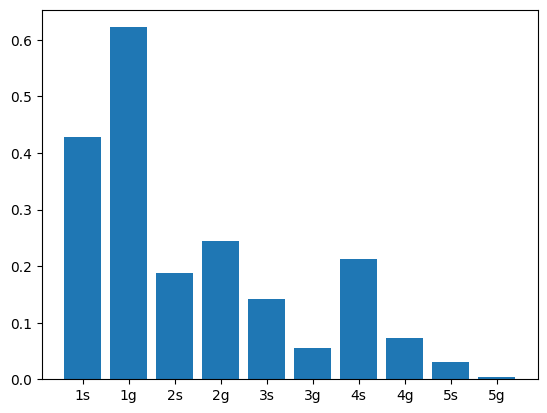

In [57]:
cat1_s = df.loc[(df.avg_gl_level_category==1)&(df.stroke==1)].shape[0]
cat1_g = df.loc[(df.avg_gl_level_category==1)&(df.stroke==0)].shape[0]
cat2_s = df.loc[(df.avg_gl_level_category==2)&(df.stroke==1)].shape[0]
cat2_g = df.loc[(df.avg_gl_level_category==2)&(df.stroke==0)].shape[0]
cat3_s = df.loc[(df.avg_gl_level_category==3)&(df.stroke==1)].shape[0]
cat3_g = df.loc[(df.avg_gl_level_category==3)&(df.stroke==0)].shape[0]
cat4_s = df.loc[(df.avg_gl_level_category==4)&(df.stroke==1)].shape[0]
cat4_g = df.loc[(df.avg_gl_level_category==4)&(df.stroke==0)].shape[0]
cat5_s = df.loc[(df.avg_gl_level_category==5)&(df.stroke==1)].shape[0]
cat5_g = df.loc[(df.avg_gl_level_category==5)&(df.stroke==0)].shape[0]

pct_cat1_s = cat1_s / df.loc[df.stroke==1].shape[0]
pct_cat1_g = cat1_g / df.loc[df.stroke==0].shape[0]
pct_cat2_s = cat2_s / df.loc[df.stroke==1].shape[0]
pct_cat2_g = cat2_g / df.loc[df.stroke==0].shape[0]
pct_cat3_s = cat3_s / df.loc[df.stroke==1].shape[0]
pct_cat3_g = cat3_g / df.loc[df.stroke==0].shape[0]
pct_cat4_s = cat4_s / df.loc[df.stroke==1].shape[0]
pct_cat4_g = cat4_g / df.loc[df.stroke==0].shape[0]
pct_cat5_s = cat5_s / df.loc[df.stroke==1].shape[0]
pct_cat5_g = cat5_g / df.loc[df.stroke==0].shape[0]

plt.bar(["1s","1g","2s","2g","3s","3g","4s","4g","5s","5g"],[pct_cat1_s,pct_cat1_g,pct_cat2_s,pct_cat2_g,pct_cat3_s,pct_cat3_g,pct_cat4_s,pct_cat4_g,pct_cat5_s,pct_cat5_g])
plt.show()

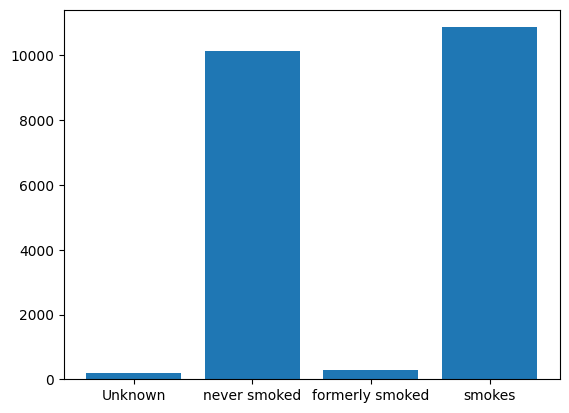

In [58]:
smoking_s_1 = my_data.loc[(my_data.smoking_status ==0 )&(my_data.stroke==1)].shape[0]
smoking_s_2 = my_data.loc[(my_data.smoking_status ==1 )&(my_data.stroke==1)].shape[0]
smoking_s_3 = my_data.loc[(my_data.smoking_status ==2 )&(my_data.stroke==1)].shape[0]
smoking_s_4 = my_data.loc[(my_data.smoking_status ==3 )&(my_data.stroke==1)].shape[0]
plt.bar(["Unknown","never smoked","formerly smoked","smokes"],[smoking_s_1,smoking_s_2,smoking_s_3,smoking_s_4])
plt.show()

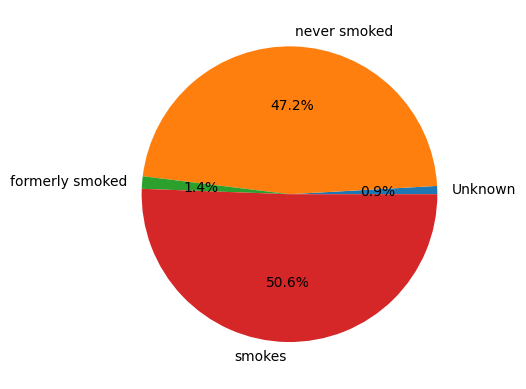

In [59]:
plt.pie([smoking_s_1,smoking_s_2,smoking_s_3,smoking_s_4],labels=["Unknown","never smoked","formerly smoked","smokes"],autopct="%1.1f%%")
plt.show()

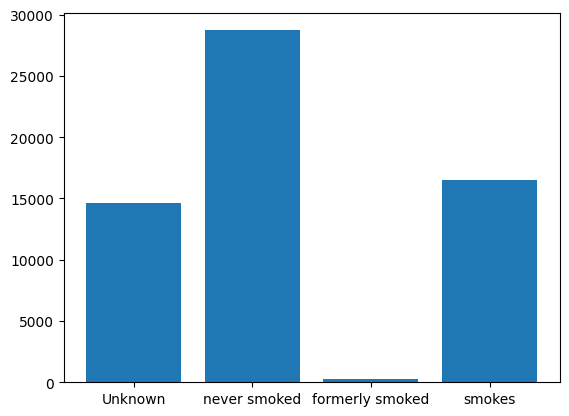

In [60]:
smoking_g_1 = my_data.loc[(my_data.smoking_status ==0 )&(my_data.stroke==0)].shape[0]
smoking_g_2 = my_data.loc[(my_data.smoking_status ==1 )&(my_data.stroke==0)].shape[0]
smoking_g_3 = my_data.loc[(my_data.smoking_status ==2 )&(my_data.stroke==0)].shape[0]
smoking_g_4 = my_data.loc[(my_data.smoking_status ==3 )&(my_data.stroke==0)].shape[0]
plt.bar(["Unknown","never smoked","formerly smoked","smokes"],[smoking_g_1,smoking_g_2,smoking_s_3,smoking_g_4])
plt.show()

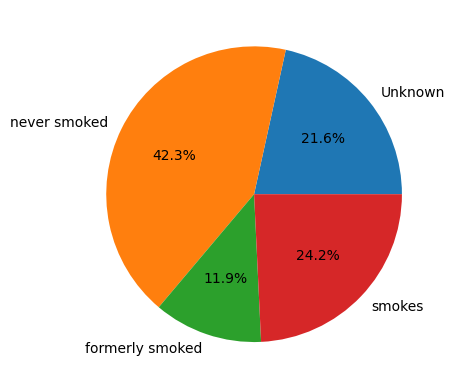

In [61]:
plt.pie([smoking_g_1,smoking_g_2,smoking_g_3,smoking_g_4],labels=["Unknown","never smoked","formerly smoked","smokes"],autopct="%1.1f%%")
plt.show()

In [62]:
ever_married_s = my_data.loc[(my_data.ever_married ==1 )&(my_data.stroke==1)].shape[0]
not_married_s = my_data.loc[(my_data.ever_married ==0 )&(my_data.stroke==1)].shape[0]
ever_married_g = my_data.loc[(my_data.ever_married ==1 )&(my_data.stroke==0)].shape[0]
not_married_g = my_data.loc[(my_data.ever_married ==0 )&(my_data.stroke==0)].shape[0]

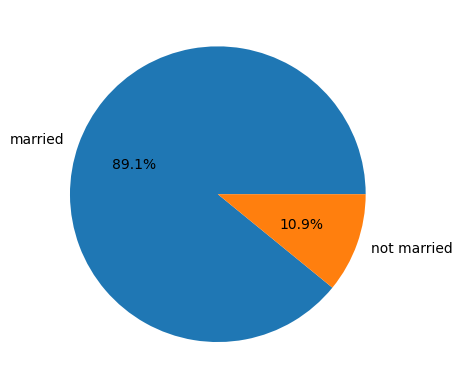

In [63]:
plt.pie([ever_married_s,not_married_s],labels=["married","not married"],autopct="%1.1f%%")
plt.show()

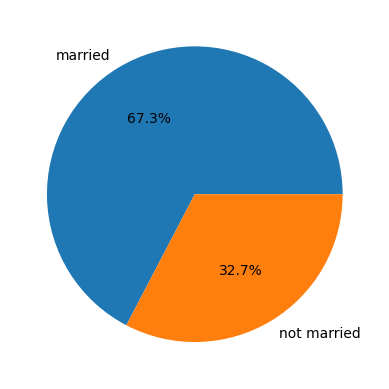

In [64]:
plt.pie([ever_married_g,not_married_g],labels=["married","not married"],autopct="%1.1f%%")
plt.show()

# Model Selection

## Logistic Regression

In [65]:
X = my_data.drop('stroke', axis=1)
X

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,gender,bmi_category_pct
0,67.0,0,1,1,4,1,228.69,36.6,2,1,0.249440
1,61.0,0,0,1,3,0,202.21,29.5,1,0,0.269977
2,80.0,0,1,1,4,0,105.92,32.5,1,1,0.290912
3,49.0,0,0,1,4,1,171.23,34.4,3,0,0.290912
4,79.0,1,0,1,3,0,174.12,24.0,1,0,0.181521
...,...,...,...,...,...,...,...,...,...,...,...
89415,38.0,0,0,0,4,1,120.94,29.7,3,1,0.269977
89416,53.0,0,0,1,4,0,77.66,40.8,1,0,0.249440
89417,32.0,0,0,1,2,0,231.95,33.2,1,1,0.290912
89418,42.0,0,0,1,3,0,216.38,34.5,1,1,0.290912


In [66]:
y = my_data.stroke
y

0        1
1        1
2        1
3        1
4        1
        ..
89415    0
89416    0
89417    0
89418    0
89419    0
Name: stroke, Length: 89420, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split

# First split: splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Second split: splitting the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

# Check the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)


X_train shape: (64605, 11)
X_val shape: (11402, 11)
X_test shape: (13413, 11)
y_train shape: (64605,)
y_val shape: (11402,)
y_test shape: (13413,)


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
y_pred = logistic_regression_model.predict(X_val)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')
print("Classification_report:")
# The classification report and confusion matrix
print(classification_report(y_val, y_pred))
print("Confusion_matrix :")
print(confusion_matrix(y_val, y_pred))


Accuracy: 0.7888089808805473
Classification_report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      8668
           1       0.62      0.30      0.40      2734

    accuracy                           0.79     11402
   macro avg       0.72      0.62      0.64     11402
weighted avg       0.77      0.79      0.76     11402

Confusion_matrix :
[[8175  493]
 [1915  819]]


/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


There are many FN values.

In [69]:
# Regularization with L2 penalty
logistic_regression_l2 = LogisticRegression(penalty='l2', C=0.5)
logistic_regression_l2.fit(X_train, y_train)
y_pred_l2 = logistic_regression_l2.predict(X_val)

# Calculate the accuracy of the models
accuracy_l2 = accuracy_score(y_val, y_pred_l2)
print(f'Accuracy with L2 regularization: {accuracy_l2}')
print("Classification_report pred2:")
# The classification report and confusion matrix
print(classification_report(y_val, y_pred_l2))
print("Confusion_matrix :")
print(confusion_matrix(y_val, y_pred_l2))

Accuracy with L2 regularization: 0.7911769864935976
Classification_report pred2:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      8668
           1       0.63      0.32      0.42      2734

    accuracy                           0.79     11402
   macro avg       0.72      0.63      0.65     11402
weighted avg       0.77      0.79      0.77     11402

Confusion_matrix :
[[8143  525]
 [1856  878]]


/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline with StandardScaler and Logistic Regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression())

# Define a grid of parameters to search over
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100], 'logisticregression__penalty': ['l1', 'l2']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Evaluate the model on the test set
y_pred = grid_search.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Test set score: ", accuracy)
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))


/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py", line 420, in fit
    self._final

Best parameters:  {'logisticregression__C': 1, 'logisticregression__penalty': 'l2'}
Best cross-validation score:  0.7827103165389676
Test set score:  0.7873180143834415
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      8668
           1       0.62      0.30      0.40      2734

    accuracy                           0.79     11402
   macro avg       0.71      0.62      0.64     11402
weighted avg       0.76      0.79      0.76     11402

Confusion Matrix:
[[8157  511]
 [1914  820]]


## Decision trees

In [71]:
my_data

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender,bmi_category_pct
0,67.0,0,1,1,4,1,228.69,36.6,2,1,1,0.249440
1,61.0,0,0,1,3,0,202.21,29.5,1,1,0,0.269977
2,80.0,0,1,1,4,0,105.92,32.5,1,1,1,0.290912
3,49.0,0,0,1,4,1,171.23,34.4,3,1,0,0.290912
4,79.0,1,0,1,3,0,174.12,24.0,1,1,0,0.181521
...,...,...,...,...,...,...,...,...,...,...,...,...
89415,38.0,0,0,0,4,1,120.94,29.7,3,0,1,0.269977
89416,53.0,0,0,1,4,0,77.66,40.8,1,0,0,0.249440
89417,32.0,0,0,1,2,0,231.95,33.2,1,0,1,0.290912
89418,42.0,0,0,1,3,0,216.38,34.5,1,0,1,0.290912


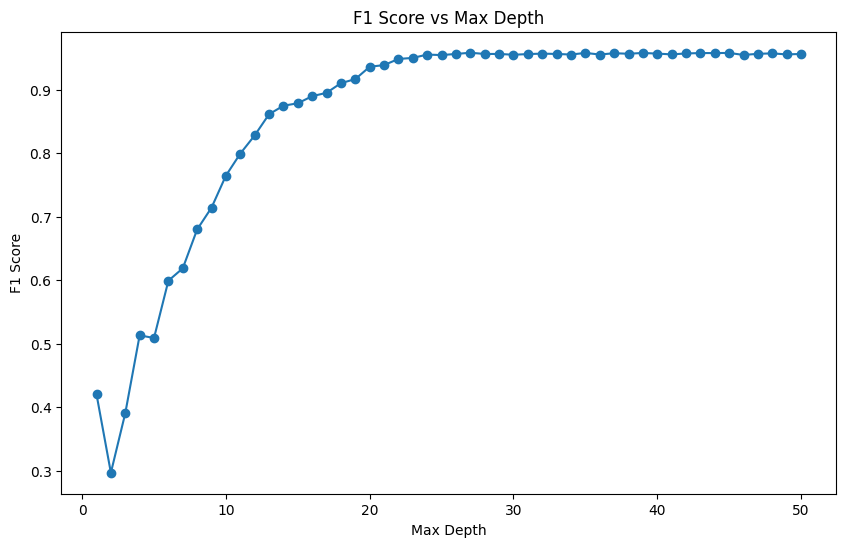

The best max_depth based on F1 score is 27 with an F1 score of 0.9585220068828111.


In [72]:
from sklearn.tree import DecisionTreeClassifier

max_depth_values = range(1, 51)
conf_matrices = []

for max_depth_value in max_depth_values:
    clf = DecisionTreeClassifier(max_depth=max_depth_value)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    conf_matrix = confusion_matrix(y_val, y_pred)
    conf_matrices.append(conf_matrix)

# Calculate the F1 score for each confusion matrix
f1_scores = [2 * matrix[1, 1] / (2 * matrix[1, 1] + matrix[0, 1] + matrix[1, 0]) for matrix in conf_matrices]

# Find the max F1 score and corresponding max_depth
best_f1_score = max(f1_scores)
best_max_depth = max_depth_values[f1_scores.index(best_f1_score)]

# Visualize the F1 scores for different max_depth values
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, f1_scores, marker='o')
plt.title('F1 Score vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.show()

print(f"The best max_depth based on F1 score is {best_max_depth} with an F1 score of {best_f1_score}.")